# Classification with Logistic regression

We will use the breast-cancer dataset for building the classification models

More info about the dataset: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

## Load data 

In [ ]:
# Breast cancer data is part of scikit learn
from sklearn import datasets
data = datasets.load_breast_cancer()
X, y = data.data, data.target

# Let's look into the data

In [ ]:
data

{'DESCR': '.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry\n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        worst/largest values) of these features were computed for each image,\n        resulting in 30 features.

## Let's look at the components

In [ ]:
# names of the features
print(data.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [ ]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

### Train test split. Please see episode 2 for more details

In [ ]:
#scikit learn provides an utility for train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [ ]:
# Number of observations (rows) and number of features/variables (columns) in training
num_rows = len(X_train)
num_cols = len(X_train[0])
print(f"rows={num_rows}, cols={num_cols}")

rows=455, cols=30


# Building a logistic regression model
In this dataset, for each observation, we have 30 features (or variables, predictors) and 1 output (target or response).

So, we have 30 features: *𝑥1, 𝑥2, ..., 𝑥30* and the output *𝐘*
As we have seen in episode 3a, the logistic regression model for this would be:

𝐘 = σ( β0 + β1.𝑥1 + β2.𝑥2 + ... + β30.𝑥30)



# Let's build a quick model
## We will refine it later

In [ ]:
# We use sklearn's LogisticRegression 
from sklearn.linear_model import LogisticRegression
#Build a classifier
classifier = LogisticRegression(random_state = 0)
# Fit or train the model using the training data (X and y)
classifier.fit(X_train, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(random_state=0)

## Let's check the model

In [ ]:
print(classifier.classes_)

[0 1]


In [ ]:
classifier.intercept_

array([0.24229794])

In [ ]:
classifier.coef_[0]

array([ 1.27120631,  0.53104743,  0.09708479, -0.01104135, -0.04880264,
       -0.23271777, -0.32159675, -0.13762949, -0.07282662, -0.01475604,
        0.04364483,  0.55553143,  0.05201804, -0.10287029, -0.00455004,
       -0.04761377, -0.06574448, -0.01770278, -0.01714852, -0.00417679,
        1.33641113, -0.56227185, -0.2011313 , -0.01532972, -0.08682724,
       -0.70238356, -0.8682992 , -0.25450112, -0.23456291, -0.06531525])

In [ ]:
# Variable with max coeff
data.feature_names[np.argmax(classifier.coef_[0])]

'worst radius'

In [ ]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
predictions = classifier.predict(X_test)

In [ ]:
predictions

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0])

In [ ]:
# a single case prediction
classifier.predict([X_test[2]])

array([0])

In [ ]:
X_test[1]

array([1.894e+01, 2.131e+01, 1.236e+02, 1.130e+03, 9.009e-02, 1.029e-01,
       1.080e-01, 7.951e-02, 1.582e-01, 5.461e-02, 7.888e-01, 7.975e-01,
       5.486e+00, 9.605e+01, 4.444e-03, 1.652e-02, 2.269e-02, 1.370e-02,
       1.386e-02, 1.698e-03, 2.486e+01, 2.658e+01, 1.659e+02, 1.866e+03,
       1.193e-01, 2.336e-01, 2.687e-01, 1.789e-01, 2.551e-01, 6.589e-02])

In [ ]:
classifier.predict_proba([X_test[1]])

array([[9.99999988e-01, 1.17333832e-08]])

In [ ]:
#change the value of one feature
p = X_test[1]
#Let's increase the value of feature #20 ("worst radius")
p[20] = 40.0
classifier.predict_proba([p])

array([[0.12212739, 0.87787261]])

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
print(cm)

[[40  3]
 [ 1 70]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


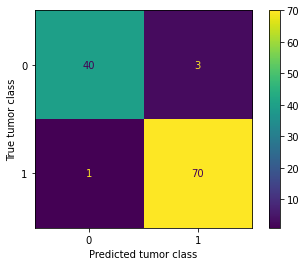

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier, X_test, y_test)
plt.xlabel("Predicted tumor class")
plt.ylabel("True tumor class")
plt.show()

In [ ]:
accuracy = (40+70)/(40+3+1+70)
accuracy

0.9649122807017544